##Variables and their definitions

 `n` -> number of time periods 

 `e_t` -> expenditure at time `t`

 `e`  -> expense stream matrix (of dimension `n*1`)

 `b_t` -> bank balance at time `t`

 `w_t` -> withdrawal at time `t`

 `rho` -> interest rate offered by the bank 

 `P` -> Payout matrix for each investment type (of dimension `n * m`)

 `m` -> number of investment types 

 `x_j`-> purchased dollars of investment type `j` (of dimension `m * 1`)

## Decision Variable 

`x_j` -> purchased dollars of investment type `j`

`x` -> purchased investments matrix (of dimension m)

`b` -> column vector of dimension n with account balance at time `t`

## Penalty for the problem 

This is the sum of the initial account balance `b[0]` and the initial investments purchased which is `1T * x`. 

`Penalty = b[0] + 1T * x`

## Constraints for our problem 

* `b >= 0`
* `w_t + (Px)_t >= e_t`
* `w_t >= 0`
* `x >= 0`



## Convex Optimizaton Problem 

`Minimize (penalty)`

So, we have to minimize the following quantity 

`Minimize(b[0] + 1T *x)`

###expense_stream_data


In [ ]:
import numpy as npy
import cvxpy as cvpy

m = 29
n = 36

P = npy.matrix([
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,]
])

e = npy.matrix([
  0.000000,
  1.000000,
  2.000000,
  3.000000,
  4.000000,
  5.000000,
  6.000000,
  7.000000,
  8.000000,
  16.000000,
  16.600000,
  17.200000,
  17.800000,
  18.400000,
  19.000000,
  19.600000,
  20.200000,
  18.000000,
  17.000000,
  16.000000,
  15.000000,
  14.000000,
  13.000000,
  12.000000,
  11.000000,
  10.000000,
  9.000000,
  8.000000,
  7.000000,
  6.000000,
  5.000000,
  4.000000,
  3.000000,
  2.000000,
  1.000000,
  0.000000,
]).T

rho = 0.002500

## Part - (b) 
#### Minimum initial investment possible

In [ ]:
#decision variables
x = cvpy.Variable((m,1))
w = cvpy.Variable((n,1))
b = cvpy.Variable((n,1))

#penalty of the problem
cost = b[0] + (npy.ones(m))@x

#objective of the problem 
objective = cvpy.Minimize(cost)

#constraints of the problem
constraints = [b>=0, w + P@x >= e, w>=0, x>=0]

for i in range(0, n-1):
  constraints += [b[i+1] == (1 + rho)*(b[i]) - w[i]]

#formulating our convex optimization problem 
prob = cvpy.Problem(objective, constraints)
                    
result = prob.solve()

print("Minimum initial investment possible is ", result)

Minimum initial investment possible is  197.91922192857714


## Part - (b)
#### The initial funding required when no investments are purchased

In [ ]:
#decision variables
w = cvpy.Variable((n,1))
b = cvpy.Variable((n,1))

#penalty of the problem
cost = b[0]

#objective of the problem 
objective = cvpy.Minimize(cost)

#constraints of the problem
constraints = [b>=0, w >= e]

for i in range(0, n-1):
  constraints += [b[i+1] == (1 + rho)*(b[i]) - w[i]]

#formulating our convex optimization problem 
prob = cvpy.Problem(objective, constraints)
                    
result = prob.solve()

print("If no investments are bought, the minimum initial investment wil be", result) 

If no investments are bought, the minimum initial investment wil be 336.5454048246554


## Graph Plots 

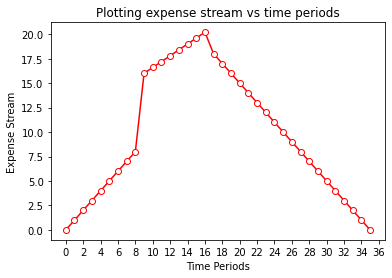

In [ ]:
from matplotlib import pyplot as plt 

# plotting the expense stream as a function of time t 

plt.plot(e, color = 'red', marker='o', mfc='white')
plt.xticks(range(0, n+1, 2))

plt.title('Plotting expense stream vs time periods') 
plt.ylabel('Expense Stream') 
plt.xlabel('Time Periods')
plt.show()

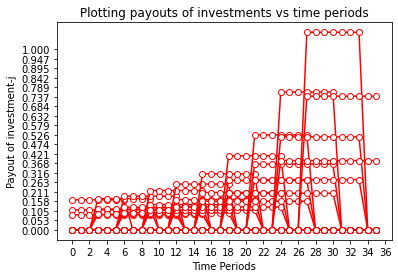

In [ ]:
# plotting the payouts of investments as a function of time t 
# m different curves are plotted -> corresponding to each investment type

plt.plot(P, color = 'red', marker='o', mfc='white')
plt.xticks(range(0, n+1, 2))
plt.yticks(npy.linspace(0, 1, 20))

plt.title('Plotting payouts of investments vs time periods') 
plt.ylabel('Payout of investment-j') 
plt.xlabel('Time Periods')
plt.show()

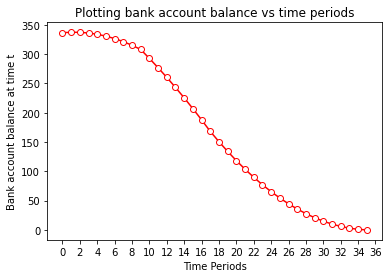

In [ ]:
#plotting the bank account balance against time period t 

data = npy.ones((n,1))

for i in range(0, n):
  data[i] = b[i].value

plt.plot(data, color = 'red', marker='o', mfc='white')
plt.xticks(range(0, n+1, 2))
plt.title('Plotting bank account balance vs time periods') 
plt.ylabel('Bank account balance at time t') 
plt.xlabel('Time Periods')
plt.show()